<a href="https://colab.research.google.com/github/vpttra/vpttra/blob/main/Quantile%20regression%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantile regression in linear formulation


***Under the scope of Data Science for Business 2022 course at Aalto University school of business***

Provided with the data on distance between shop and buyer and the time spent to deliver the order of the buyer, the aims are to explore the data and to build quantile regression models to estimate the delivery predictions.





In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import QuantileRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate


In [3]:
# Load the given .csv dataset

df = pd.read_csv('data.csv',sep = ';') 


In [4]:
# Print the first 5 rows of the DataFrame "df"

df.head()

,distance,time_to_buyer
0,4.021082,20.681184
1,4.570677,19.573632
2,3.613144,20.264209
3,2.943877,19.586117
4,3.325419,19.952124


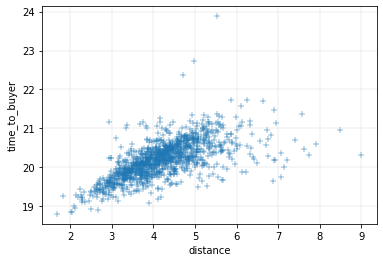

In [5]:
# Visualize data
plt.clf()
plt.rcParams.update({'font.size': 10, 'figure.dpi':150})
sns.scatterplot(data=df, x="distance", y="time_to_buyer", marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [6]:
# Create the feature matrix (numpy array X) from the column "distance" of "df" DataFrame, make sure X.shape==(len(X),1)
# and create label vector (numpy array y) from "time_to_buyer" of "df" DataFrame, make sure y.shape==(len(y),1)

X = df[['distance']]
y = df[['time_to_buyer']]
print(y.shape==(len(y),1))



True


In [7]:
# Create a list named quantiles, that contains the values of quantiles to estimate: 0.1, 0.5, 0.9

quantiles = [0.1, 0.5, 0.9]

In [8]:
# Create an empty dictionary named predictions, where we will store our results 

predictions = {}

In [9]:
# initialise a QuantileRegressor, set quantile and set argument alpha = 0
# fit the model to the data 
# compute predicted labels for all data points and append result to the predictions dictionary

for quantile in quantiles:
  qr = QuantileRegressor(quantile=quantile, alpha = 0)
  qr = QuantileRegressor.fit(qr,X,y)
  y_pred_qr = qr.predict(X)
  predictions[quantile] = y_pred_qr

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# initialise a LinearRegression
# fit the model to the data 
# compute predicted labels for all data points

lr = LinearRegression()
lr.fit(X, y, sample_weight=None)
y_pred_lr = lr.predict(X)

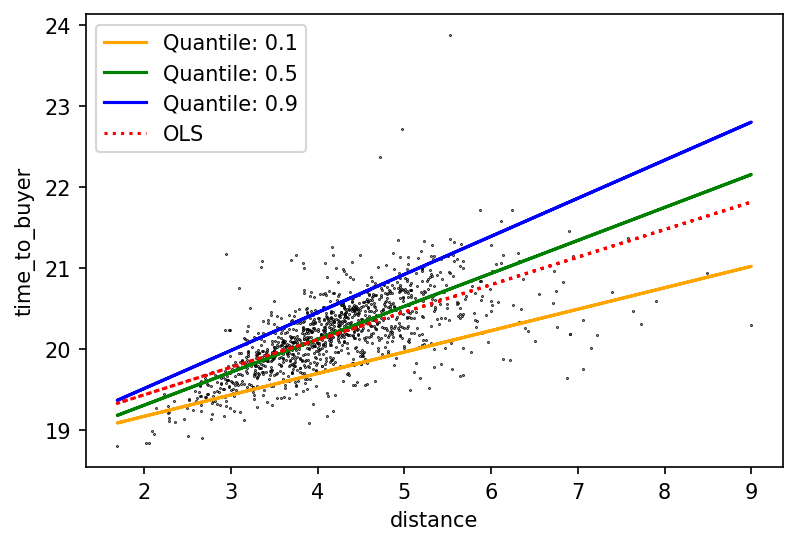

In [11]:
# Visualize data
colordict = {
  0.1 : "orange",
  0.5 : "green",
  0.9 : "blue"
  }
plt.clf()
plt.rcParams.update({'font.size': 10, 'figure.dpi':300})
for quantile, y_pred_qr in predictions.items():
    plt.plot(X, y_pred_qr, label=f"Quantile: {quantile}", color = colordict.get(quantile))
plt.plot(X, y_pred_lr, color="red", linestyle="dotted", label = "OLS")
plt.scatter(X, y, marker = '.', color = "black", s=0.5)
plt.xlabel("distance")
plt.ylabel("time_to_buyer")
plt.legend()

# **Interpreting the graph:**
The blue line represent quantile 0.9, which means in 90% of cases the delivery time will be less than the corresponding value on the line for each distance.

The green line is median line (quantile 0.5), and it splits the data points in half, the bigger half above the line, and the lower half under.

The yellow line represent quantile 0.1, which means in 10% of cases the delivery time will be less than the corresponding value on the line for each distance.

80% of all cases will have the delivery time between the yellow and blue line.

For example, we can interprete the results about predicted time-to-buyer when distance is 5km as below:

* 90% of the time-to-buyer will be lower than 21 minutes
* 50 % of the time-to-buyer will be lower than 20.5 minutes
* 10 % of the time-to-buyer will be lower than 19.8 minutes
* 80% of the time-to-buyer will be between 19.8 minutes to 21 minutes.

#**Building prediction model and check the result with cross validation**

In [12]:
 # initialise a LinearRegression, use default value for all arguments
# fit the model to the data # compute predicted labels for all data points

linear_regression = LinearRegression()
linear_regression.fit(X,y,sample_weight = None)
y_pred_linear_regression = linear_regression.predict(X)

In [13]:
# initialise a QuantileRegressor, choose quantile equivalent to median estimation, set argument alpha = 0
# fit the model to the data 
# compute predicted labels for all data points

quantile_regression = QuantileRegressor(quantile = 0.5, alpha = 0)
quantile_regression.fit(X,y,sample_weight = None)
y_pred_quantile_regression = quantile_regression.predict(X)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# Print the results

print(
  f"""Training error (in-sample performance)
  {linear_regression.__class__.__name__}:
  MAE = {mean_absolute_error(y, y_pred_linear_regression):.3f}
  MSE = {mean_squared_error(y, y_pred_linear_regression):.3f}
  {quantile_regression.__class__.__name__}:
  MAE = {mean_absolute_error(y, y_pred_quantile_regression):.3f}
  MSE = {mean_squared_error(y, y_pred_quantile_regression):.3f}
  """
)

Training error (in-sample performance)
  LinearRegression:
  MAE = 0.266
  MSE = 0.135
  QuantileRegressor:
  MAE = 0.263
  MSE = 0.139
  


In [15]:
# Create cross-validation instance for linear regression
cv_results_lr = cross_validate(linear_regression
,
  X, 
  y,
  cv=3,
  scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)

In [16]:
# Create cross-validation instance for quantile regression
cv_results_qr = cross_validate(quantile_regression
  , # specify the name of the QuantileRegressor, which was initialized in the beginning of task c), BEFORE THE COMMA
  X,
  y,
  cv=3,
  scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Print the results

print(
    f"""Test error (cross-validated performance)
    {linear_regression.__class__.__name__}:
    MAE = {-cv_results_lr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_lr["test_neg_mean_squared_error"].mean():.3f}
    {quantile_regression.__class__.__name__}:
    MAE = {-cv_results_qr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_qr["test_neg_mean_squared_error"].mean():.3f}
    """
)

Test error (cross-validated performance)
    LinearRegression:
    MAE = 0.266
    MSE = 0.136
    QuantileRegressor:
    MAE = 0.263
    MSE = 0.140
    



# **Checking emperical errors:**


LinearRegression:
* MAE = 0.266

* MSE = 0.135

QuantileRegressor:

* MAE = 0.263

* MSE = 0.139


--> On the training set, we see that MAE is lower for QuantileRegressor than LinearRegression. MSE is lower for LinearRegression than QuantileRegressor.

 *These results confirms that MAE is the loss minimized by QuantileRegressor while MSE is the loss minimized LinearRegression.*


Similarly, looking a the test error obtained by cross-validation, we also see that MAE is lower for QuantileRegressor than LinearRegression, and MSE is lower for LinearRegression than QuantileRegressor.

LinearRegression:

* MAE = 0.266
* MSE = 0.136

QuantileRegressor:
* MAE = 0.263
* MSE = 0.140
    

